<a href="https://colab.research.google.com/github/cvs2010/machine_learning_image_recog/blob/main/imagerecognition_binary_catdog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando a biblioteca do Python TensorFlow (Machine Learning):
TensorFlow é uma biblioteca de código-fonte aberto amigável para Python para computação numérica que torna o aprendizado de máquina mais rápido e fácil.

In [779]:
import tensorflow as tf

In [780]:
%tensorflow_version 2.1

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [781]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [782]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


Importando a biblioteca keras (DeepLearning) do TensorFlow: Keras é uma biblioteca aberta de Deep Learning implementada utilizando TensorFlow para diversas linguagens/plataformas, como Python e R, como foco na sua facilidade para utilização. Ela permite modelar e treinar modelos de redes neurais com poucas linhas de código.

In [783]:
from keras.preprocessing import image

In [784]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

A Biblioteca OS é muito utilizada para fazer automação de processos no Python, então você pode fazer algumas automações

O NumPy é uma biblioteca para a linguagem Python com funções para se trabalhar com computação numérica. Seu principal objeto é o vetor n-dimensional, ou ndarray . Um vetor n-dimensional também é conhecido pelo nome tensor.

O Matplotlib é uma biblioteca Python frequentemente utilizada para ciência de dados. A ferramenta de código aberto oferece recursos de plotagem para a criação de gráficos 2D e 3D com visualizações estáticas, animadas e interativas.

In [785]:
import os
import matplotlib.pyplot as plt
import numpy as np

Biblioteca utilizada para criar "logs" de Erros na execução do código

In [786]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

Importação do URL com as imagens para análise do MachineLearning

In [787]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted', origin=_URL, extract=True)

cats_and_dogs_filtered
|__ train
    |__ cats: [cat.0.jpg, cat.1.jpg, cat.2.jpg ...]
    |__ dogs: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ validationn
    |__ cats: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ...]
    |__ dogs: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]


Buscar o diretório com o arquivo ZIP das imagens e buscar por tipo de arquivo realizando um print

In [788]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base - type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filterted
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.21.jpg
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.493.jpg
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.127.jpg
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.721.jpg
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.819.jpg
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.79.jpg
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.735.jpg
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.767.jpg
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.115.jpg
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.408.jpg
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.848.jpg
/root/.keras/datasets/cats_and_dog

Segregando os diretórios Base, treino e validação para leitura do MachineLearning

In [789]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') #directory of training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') #directory of training cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') #directory of validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs') #directory of validation cat pictures

Criando as variáveis para identificar os diretórios

In [790]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

'Printando' o total do treino e da validação de imagens

In [791]:
print('total training cat images', num_cats_tr)
print('total training dog images', num_dogs_tr)

print('total validation cat images', num_cats_tr)
print('total validation dog images', num_dogs_tr)
print('--')
print('total training images', total_train)
print('total validation images', total_val)

total training cat images 1000
total training dog images 1000
total validation cat images 1000
total validation dog images 1000
--
total training images 2000
total validation images 1000


Número de exemplos de formação a processar antes de actualizar as variáveis dos modelos.
Os dados de formação consistem em largura e altura das imagens de 150 pixels

In [792]:
BATCH_SIZE = 100 # Number of training examples to process before updating model's variables
IMG_SHAPE = 150 # Training data consists of image's width and height of 150 pixels

Ajustando a escala do Gerador

In [793]:
train_image_generator = ImageDataGenerator(rescale=1./255)   # Generator for training data
validation_image_generator = ImageDataGenerator(rescale=1./255)   # Generator for validation data

In [794]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #150 x 150 px
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [795]:
sample_training_images, _ = next(train_data_gen)

In [796]:
#This function plots images in the form of a grid with 1 row and 5 columns where images are placed in each column
def plotImages (images_arr):
    flg, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip (image_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [797]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])


Parâmetros de ajuste da acurácia

In [798]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Apresentar os resultados da acurácia e perda do código

In [799]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 17, 17, 128)    

In [800]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE)))
)

<ipython-input-800-04352a45d97c>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
20/20 [==============================] - 127s 6s/step - loss: 0.7149 - accuracy: 0.4965 - val_loss: 0.6916 - val_accuracy: 0.5050
Epoch 2/100
20/20 [==============================] - 123s 6s/step - loss: 0.6908 - accuracy: 0.5295 - val_loss: 0.6928 - val_accuracy: 0.5010
Epoch 3/100
20/20 [==============================] - 124s 6s/step - loss: 0.6842 - accuracy: 0.5640 - val_loss: 0.6545 - val_accuracy: 0.6540
Epoch 4/100
20/20 [==============================] - 124s 6s/step - loss: 0.6534 - accuracy: 0.6190 - val_loss: 0.6138 - val_accuracy: 0.6780
Epoch 5/100
20/20 [==============================] - 124s 6s/step - loss: 0.5959 - accuracy: 0.6830 - val_loss: 0.6604 - val_accuracy: 0.6200
Epoch 6/100
20/20 [==============================] - 124s 6s/step - loss: 0.5655 - accuracy: 0.7065 - val_loss: 0.5876 - val_accuracy: 0.7010
Epoch 7/100
20/20 [==============================] - 124s 6s/step - loss: 0.5095 - accuracy: 0.7465 - val_loss: 0.5917 - val_accuracy: 0.6930
Epoch 

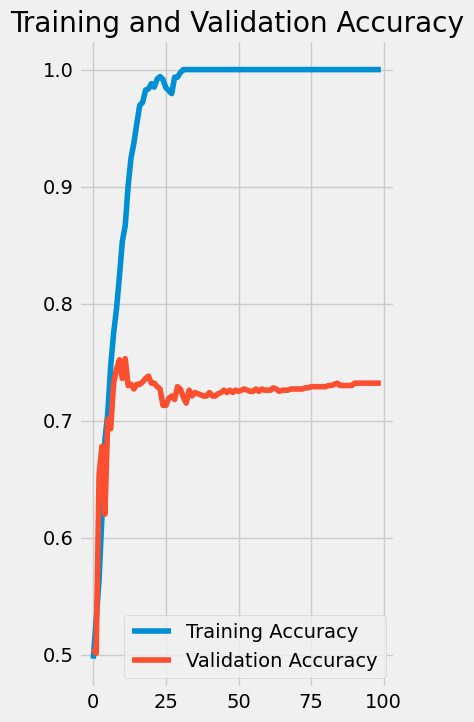

In [801]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.savefig('./foo.png')
plt.show()

In [802]:
model.save('modelo.h5')
from google.colab import files
files.download('modelo.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>